## Immune Suppression tests

In this notebook we will examine an immune suppression therapy, and how the level of suppression affects tumor growth. 

We are assuming a cancer situation for a patient presenting an autoimmune disease, such as lupus or arthritis. 


In [6]:
from sys import path
from os import getcwd
print(getcwd())
path.append("/home/soulfex/git_workspace/Tumor_Immune_System_Simulation/Model")

from TumorModel import Tissue
from TumorModel import CellType
from TumorModel import Cell

from Therapies import Therapy
from Therapies import TherapyType

import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
from tikzplotlib import save as tikz_save

/home/soulfex/git_workspace/Tumor_Immune_System_Simulation/Tests


In [2]:
import csv

def exportCSVTable(data, headers, path):
    f = open(path, 'w')
    writer = csv.writer(f, delimiter = ',')
    writer.writerow(headers)
    for i in range(0,np.size(data,0)):
        writer.writerow(data[i,:])
    f.close()
        

### Non-Malignant case

In [3]:
automatonWidth = 100
automatonHeight = 100
centerX = int(automatonWidth/2)
centerY = int(automatonWidth/2)


nSteps = 300

therapyStartDay = 50

effTCellReductions = np.linspace(0,1,50)
effRAttack = 0
probDying = 0.5

maxProlifCellsArray = []


for i in range(0,len(effTCellReductions)):
    
    effTCellReduction = effTCellReductions[i]
    print(effTCellReduction)
    therapy = Therapy(TherapyType.IMMUNE_SUPPRESSOR_THERAPY,  therapyStartDay, effTCellReduction, effRAttack,probDying)
    
    tissue = Tissue(automatonWidth, automatonHeight)
    
    tissue.addProliferatingCell(centerX, centerY)
    tissue.addProliferatingCell(centerX + 1, centerY)
    tissue.addProliferatingCell(centerX - 1, centerY)
    tissue.addProliferatingCell(centerX, centerY + 1)
    tissue.addProliferatingCell(centerX, centerY - 1)
    
    tissue.immuneSystem.activateImmuneDiseaseWithValues(0.99995,0.9)
    
    tissue.addTherapy(therapy)
    tissue.evolve(nSteps,False,False,False)
    
    maxProlifCells = np.max(tissue.cellCountSeries[:,0])
    maxProlifCellsArray.append(maxProlifCells)
    
    clear_output(wait = True)


1.0


100%|█████████████████████████████████████████| 300/300 [00:56<00:00,  5.32it/s]


In [7]:
d = np.zeros((len(maxProlifCellsArray),2))
d[:,0] = effTCellReductions
d[:,1] = maxProlifCellsArray
headers = ["Inmunno efficiency","Max.cells"]
exportCSVTable(d, headers, '/home/soulfex/git_workspace/Tumor_Immune_System_Simulation/Data/non_malignant_suppresion.csv')

Text(0, 0.5, 'Max N. Cells')

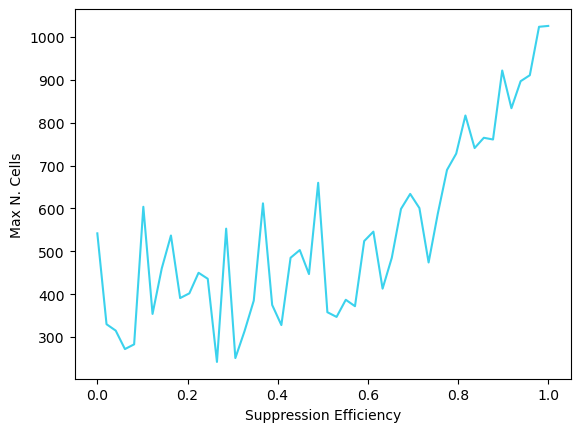

In [8]:
plt.figure()
plt.plot(effTCellReductions, maxProlifCellsArray, color = "#3bd2ed")
plt.xlabel("Suppression Efficiency")
plt.ylabel("Max N. Cells")

Let's see how immune suppression looks in the time series for the number of proliferating cells in the tumor. 

In [9]:
automatonWidth = 100
automatonHeight = 100
centerX = int(automatonWidth/2)
centerY = int(automatonWidth/2)


nSteps = 300

therapyStartDay = 50

effTCellReduction = 0.1
effRAttack = 0
probDying = 0.5

therapy = Therapy(TherapyType.IMMUNE_SUPPRESSOR_THERAPY, therapyStartDay, effTCellReduction, effRAttack,probDying)
    
tissue = Tissue(automatonWidth, automatonHeight)
    
tissue.addProliferatingCell(centerX, centerY)
tissue.addProliferatingCell(centerX + 1, centerY)
tissue.addProliferatingCell(centerX - 1, centerY)
tissue.addProliferatingCell(centerX, centerY + 1)
tissue.addProliferatingCell(centerX, centerY - 1)
    
tissue.immuneSystem.activateImmuneDiseaseWithValues(0.99995,0.9)
    
tissue.addTherapy(therapy)
tissue.evolve(nSteps,False,False,False)


100%|█████████████████████████████████████████| 300/300 [00:58<00:00,  5.09it/s]


Text(0, 0.5, 'N. proliferating cells')

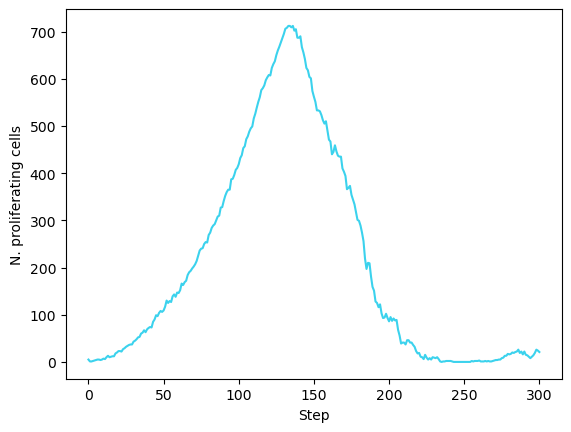

In [10]:
plt.figure()
plt.plot(tissue.cellCountSeries[:,0], color = "#3bd2ed")
plt.xlabel("Step")
plt.ylabel("N. proliferating cells")

### Malignant case

In [3]:
automatonWidth = 100
automatonHeight = 100
centerX = int(automatonWidth/2)
centerY = int(automatonWidth/2)


nSteps = 300

therapyStartDay = 50

effTCellReductions = np.linspace(0,1,50)
#effTCellReductions = [0.1,0.9]
effRAttack = 0
probDying = 0.5

maxProlifCellsArray = []


for i in range(0,len(effTCellReductions)):
    print((i/len(effTCellReductions))*100)
    print(maxProlifCellsArray)
    
    effTCellReduction = effTCellReductions[i]
    therapy = Therapy(TherapyType.IMMUNE_SUPPRESSOR_THERAPY,  therapyStartDay, effTCellReduction, effRAttack,probDying)
    
    tissue = Tissue(automatonWidth, automatonHeight)
    
    tissue.addProliferatingCell(centerX, centerY)
    tissue.addProliferatingCell(centerX + 1, centerY)
    tissue.addProliferatingCell(centerX - 1, centerY)
    tissue.addProliferatingCell(centerX, centerY + 1)
    tissue.addProliferatingCell(centerX, centerY - 1)
    
    tissue.immuneSystem.activateImmuneDiseaseWithValues(0.99995,0.9)
    tissue.makeTumorMalignantSet(2)
    
    tissue.addTherapy(therapy)
    tissue.evolve(nSteps,False,False,False)
    
    maxProlifCells = np.max(tissue.cellCountSeries[therapyStartDay:,0])
    maxProlifCellsArray.append(maxProlifCells)
    
    clear_output(wait = True)


98.0
[649.0, 654.0, 660.0, 648.0, 658.0, 638.0, 674.0, 675.0, 697.0, 683.0, 670.0, 698.0, 685.0, 690.0, 724.0, 663.0, 711.0, 694.0, 742.0, 745.0, 715.0, 726.0, 721.0, 731.0, 727.0, 769.0, 752.0, 767.0, 793.0, 802.0, 786.0, 809.0, 805.0, 801.0, 817.0, 832.0, 817.0, 824.0, 857.0, 855.0, 860.0, 881.0, 888.0, 896.0, 901.0, 913.0, 944.0, 950.0, 957.0]


100%|█████████████████████████████████████████| 300/300 [01:27<00:00,  3.44it/s]


In [4]:
d = np.zeros((len(maxProlifCellsArray),2))
d[:,0] = effTCellReductions
d[:,1] = maxProlifCellsArray
headers = ["Inmunno efficiency","Max.cells"]
exportCSVTable(d, headers, '/home/soulfex/git_workspace/Tumor_Immune_System_Simulation/Data/malignant_suppresion.csv')

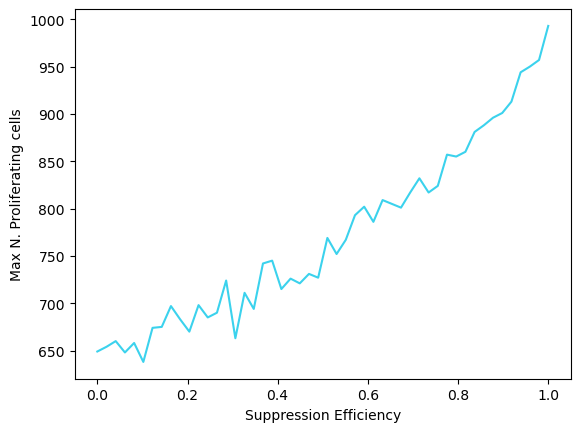

In [7]:
plt.figure()
plt.plot(effTCellReductions, maxProlifCellsArray, color = "#3bd2ed")
plt.xlabel("Suppression Efficiency")
plt.ylabel("Max N. Proliferating cells")
tikz_save('/home/soulfex/git_workspace/Tumor_Immune_System_Simulation/Tikz/malignant_suppresion.tex')

In [11]:
automatonWidth = 100
automatonHeight = 100
centerX = int(automatonWidth/2)
centerY = int(automatonWidth/2)


nSteps = 300

therapyStartDay = 50

effTCellReduction = 0.9
effRAttack = 0
probDying = 0.5

therapy = Therapy(TherapyType.IMMUNE_SUPPRESSOR_THERAPY, therapyStartDay, effTCellReduction, effRAttack,probDying)
    
tissue = Tissue(automatonWidth, automatonHeight)
    
tissue.addProliferatingCell(centerX, centerY)
tissue.addProliferatingCell(centerX + 1, centerY)
tissue.addProliferatingCell(centerX - 1, centerY)
tissue.addProliferatingCell(centerX, centerY + 1)
tissue.addProliferatingCell(centerX, centerY - 1)
    
tissue.immuneSystem.activateImmuneDiseaseWithValues(0.985,0.9)
    
tissue.addTherapy(therapy)
tissue.makeTumorMalignantSet(2)

tissue.evolve(nSteps,False,False,False)

100%|█████████████████████████████████████████| 300/300 [02:57<00:00,  1.69it/s]


Text(0, 0.5, 'N. proliferating cells')

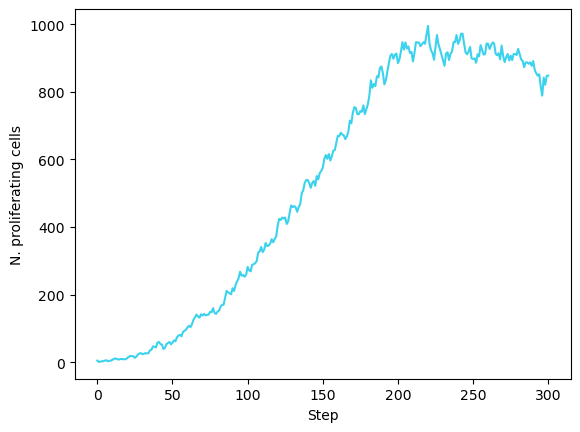

In [12]:
plt.figure()
plt.plot(tissue.cellCountSeries[:,0], color = "#3bd2ed")
plt.xlabel("Step")
plt.ylabel("N. proliferating cells")